In [2]:
from scipy.stats import norm
import autograd.numpy as np
from scipy.interpolate import interp1d
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import time as time
%matplotlib inline

np.random.seed(1)

from confint import confint

In [3]:
# data generation
n = 100
X = np.random.randn(n)
X = np.sort(X)

In [4]:
#confidence level 1 - alpha
alpha = 0.1 

#number of threads
thread_num = 8

# algorithm parameters
opt_pts_ratio = 1.0
mu = 8.0
M = 12.0
tau_max = 1e5
max_iters = 50
min_iters = 15

In [5]:
conf_int = confint(n, X, alpha, opt_pts_ratio=opt_pts_ratio)
t0 = time.time()
conf_int.compute_pw_conf_ints(thread_num=thread_num, M=M, tau_max=tau_max, mu=mu, 
                              max_iters=max_iters, min_iters=min_iters, want_verbose=False)
t1 = time.time()
print("time cost = ", t1 - t0)

num design points to optimize 13


/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:163: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:163: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/

time cost =  4.554317235946655


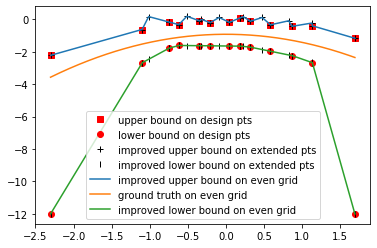

In [6]:
#plot results
opt_pts = X[conf_int.idxes_of_design_pts_to_opt]
hi_opt_pts = conf_int.hi_opt_pts
lo_opt_pts = conf_int.lo_opt_pts
plt.plot(opt_pts, np.log(hi_opt_pts), ' s', color='r', label="upper bound on design pts")
plt.plot(opt_pts, np.log(lo_opt_pts), ' o', color='r', label="lower bound on design pts")

extended_x = conf_int.extended_x
improved_lo_extended_pts = conf_int.improved_lo_extended_pts
improved_hi_extended_pts = conf_int.improved_hi_extended_pts
l_log_ext_func = interp1d(extended_x, np.log(improved_lo_extended_pts))
h_log_ext_func = interp1d(extended_x, np.log(improved_hi_extended_pts))
plt.plot(extended_x, np.log(improved_hi_extended_pts), ' +', color='k', label="improved upper bound on extended pts")
plt.plot(extended_x, np.log(improved_lo_extended_pts), ' |', color='k', label="improved lower bound on extended pts")

x_grid = np.linspace(np.min(opt_pts), np.max(opt_pts), num=10000, endpoint=True)
f_grid = norm.pdf(x_grid)
plt.plot(x_grid, (h_log_ext_func(x_grid)), label="improved upper bound on even grid")
plt.plot(x_grid, np.log(f_grid), label="ground truth on even grid")
plt.plot(x_grid, (l_log_ext_func(x_grid)), label="improved lower bound on even grid")

plt.legend()